# Exploring & Processing Data

## Exploratory Data Analysis (EDA)

### Import Packages and data

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [6]:
train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')

In [7]:
# check to see the type as pandas dataframe
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [8]:
 # Get basic information about a dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [12]:
# test data set has no Survived column. Add the column with a default value. Note that valid values are 0 and 1
# this is to ensure the two dfs have the same structure before combining them
test_df['Survived'] = -100

In [13]:
# combine the two dataframes into one
df = pd.concat((test_df, train_df), sort=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [15]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-100
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-100
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-100
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-100
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-100


In [16]:
# Get a specific column using the dot operatot
df.Name

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [17]:
# Get a specific column using the square bracket
df['Name']

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [18]:
# To select multiple columns, they are passed in as a list
df[['Name', 'Age']]

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
897,"Svensson, Mr. Johan Cervin",14.0
898,"Connolly, Miss. Kate",30.0
899,"Caldwell, Mr. Albert Francis",26.0
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0


In [19]:
# use the loc function to select a number of rows (label-based). To return ALL Columns of row 5 to 10 inclusive
df.loc[5:10,]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [20]:
# use the loc function to select a number of rows (label-based). 
# To return columns between 'Name' and 'Age' inclusive, for rows 5 to 10 inclusive
df.loc[5:10, 'Name': 'Age']

,Name,Sex,Age
PassengerId,,,
5,"Allen, Mr. William Henry",male,35.0
6,"Moran, Mr. James",male,NaN
7,"McCarthy, Mr. Timothy J",male,54.0
8,"Palsson, Master. Gosta Leonard",male,2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [21]:
#selecting discrete columns
df.loc[5:10,['Sex','Ticket', 'Embarked']]

,Sex,Ticket,Embarked
PassengerId,,,
5,male,373450,S
6,male,330877,Q
7,male,17463,S
8,male,349909,S
9,female,347742,S
10,female,237736,C


In [22]:
# use iloc for position based indexing. To return rows 5 to 10 and columns 3 to 8--zero based indexing
df.iloc[5:10, 3:8]

,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,
897,14.0,0,0,7538,9.2250
898,30.0,0,0,330972,7.6292
899,26.0,1,1,248738,29.0000
900,18.0,0,0,2657,7.2292
901,21.0,2,0,A/4 48871,24.1500


In [24]:
# conditional row filtering
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),['Name', 'Sex', 'Pclass']]
print(f'Number of male first class passengers: {male_passengers_first_class}')

Number of male first class passengers:                                                           Name   Sex  Pclass
PassengerId                                                                 
903                                 Jones, Mr. Charles Cresson  male       1
912                                     Rothschild, Mr. Martin  male       1
915                            Williams, Mr. Richard Norris II  male       1
920                                    Brady, Mr. John Bertram  male       1
926                                   Mock, Mr. Philipp Edmund  male       1
933                                Franklin, Mr. Thomas Parham  male       1
938                                   Chevre, Mr. Paul Romaine  male       1
942                                   Smith, Mr. Lucien Philip  male       1
956                                Ryerson, Master. John Borie  male       1
959                             Moore, Mr. Clarence Bloomfield  male       1
960                            Tucker

## Summary Statistics

### Numerical Features

In [26]:
# To get statistics for all numeric columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,-31.671505
std,0.837836,14.413493,1.041658,0.865560,51.758668,46.820177
min,1.000000,0.170000,0.000000,0.000000,0.000000,-100.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,-100.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [27]:
#Centrality measures. Pandas ignores missing values when calculating these
print(f'The mean fare is: {df.Fare.mean():.2f}')
print(f'The median fare is: {df.Fare.median():.2f}')

The mean fare is: 33.30
The median fare is: 14.45


In [32]:
#dispersion measures
print(f'The min fare is: {df.Fare.min():.2f}')
print(f'The max fare is: {df.Fare.max():.2f}')
print(f'The Fare range is: {df.Fare.max() - df.Fare.min():.2f}')
print(f'The 25th percentile: {df.Fare.quantile(.25):.2f}')
print(f'The 50th percentile: {df.Fare.quantile(.5):.2f}')
print(f'The 75th percentile: {df.Fare.quantile(.25):.2f}')
print(f'The variance fare is: {df.Fare.var():.2f}')
print(f'The fare standard deviation is: {df.Fare.std():.2f}')

The min fare is: 0.00
The max fare is: 512.33
The Fare range is: 512.33
The 25th percentile: 7.90
The 50th percentile: 14.45
The 75th percentile: 7.90
The variance fare is: 2678.96
The fare standard deviation is: 51.76


In [33]:

! pip install matplotlib

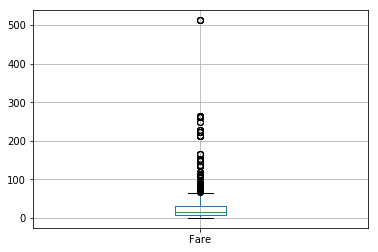

In [34]:
#Boxplot
boxplot = df.boxplot(column=['Fare'])

#### Categorical Features

In [35]:
#describe(include='all') to also include categorical features
df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,-31.671505
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,46.820177
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-100.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,-100.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [36]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [37]:
# o get the proportions, rather than the actual counts, set the normalize parameter to true
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [38]:
df[df.Survived != -100].Survived.value_counts

<bound method IndexOpsMixin.value_counts of PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64>

In [39]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

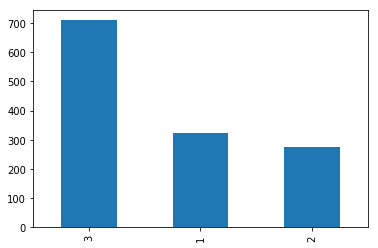

In [40]:
df.Pclass.value_counts().plot(kind='bar')

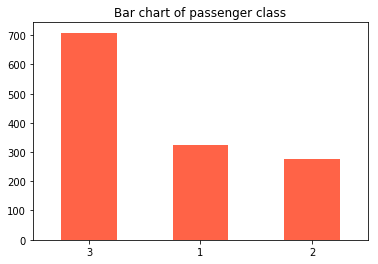

In [41]:
df.Pclass.value_counts().plot(kind='bar', rot=1, color='tomato', title='Bar chart of passenger class')

## EDA: Distribution

#### Univariate Distribution

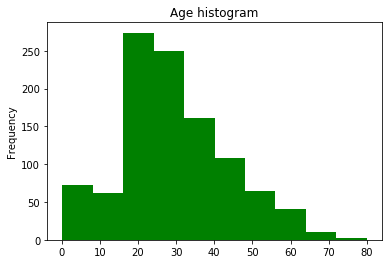

In [44]:
df.Age.plot(kind='hist', title='Age histogram', color='green');

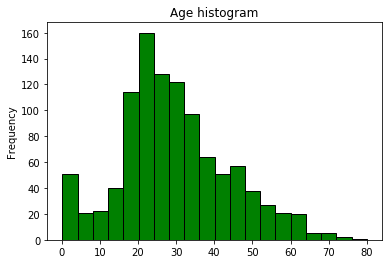

In [45]:
df.Age.plot(kind='hist', title='Age histogram', color='green', edgecolor='black', bins=20);

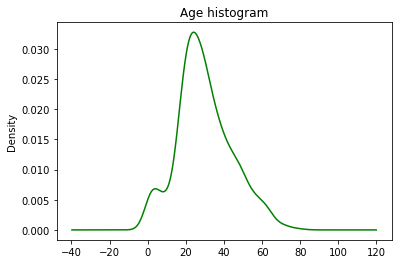

In [47]:
df.Age.plot(kind='kde', title='Age histogram', color='green');

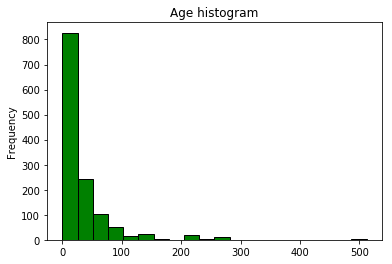

In [48]:
#postively skewed
df.Fare.plot(kind='hist', title='Age histogram', color='green', edgecolor='black', bins=20);

In [49]:
#To calulate the skewness
print(f'The skeness for Age: {df.Age.skew():.2f}')
print(f'The skeness for Fare: {df.Fare.skew():.2f}')

The skeness for Age: 0.41
The skeness for Fare: 4.37


#### Bivariate Distribution

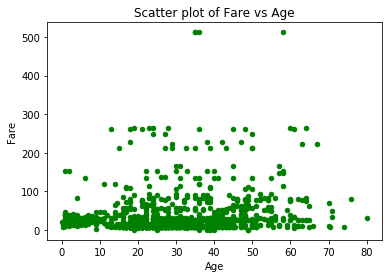

In [51]:
# scatter plot to check for possible correlation between two properties
df.plot.scatter(x='Age', y='Fare', title='Scatter plot of Fare vs Age', color='green');

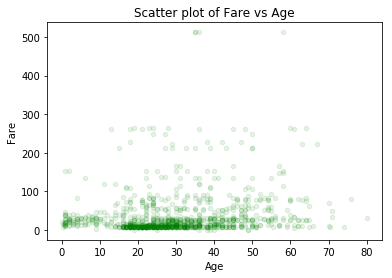

In [52]:
# The alpha parameter sets the transparency of the plot
df.plot.scatter(x='Age', y='Fare', title='Scatter plot of Fare vs Age', color='green', alpha=0.1);

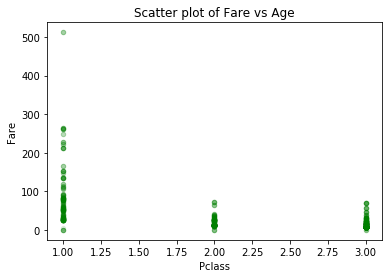

In [53]:
df.plot.scatter(x='Pclass', y='Fare', title='Scatter plot of Fare vs Age', color='green', alpha=0.1);

## EDA: Grouping & Aggregation

In [57]:
# Group by a single attribute. It could have been: df.groupby('Sex',).Age.median()
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [58]:
# Group by multiple attributes. Attributes have to be passed in as a list
df.groupby(['Sex', 'Pclass']).Age.median()

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [64]:
# Applying a single summary function. It could have been: df.groupby(['Pclass']).Fare.median()
df.groupby(['Pclass'])['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [60]:
# Applying single summary function for multiple attributes: for each passenger class, get the median of the Fare and the Age
df.groupby('Pclass')['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [61]:
# Multiple summary functions for multiple attributes: get different aggregations in one go
df.groupby('Pclass').agg({'Fare':'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [66]:
#A more complex example
aggregation = {
    'Fare': {
        'mean_fare': 'mean',
        'median_fare': 'median',
        'min_fare': 'min',
        'max_fare': np.max #Just to show the use of numpy. It could have been 'max'
    },
    'Age': {
        'mean_Age': 'mean',
        'min_Age': 'min',
        'max_Age': 'max',
        'Age_range': lambda x: max(x) - min(x)
    }
}

df.groupby('Pclass').agg(aggregation)

/Users/Victor/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_fare median_fare min_fare  max_fare   mean_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000      0.0  512.3292  39.159930    0.92    80.0   
2       21.179196     15.0458      0.0   73.5000  29.506705    0.67    70.0   
3       13.302889      8.0500      0.0   69.5500  24.816367    0.17    74.0   

                  
       Age_range  
Pclass            
1          79.08  
2          69.33  
3          73.83

#### Crosstabs

In [67]:
#crosstabs on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


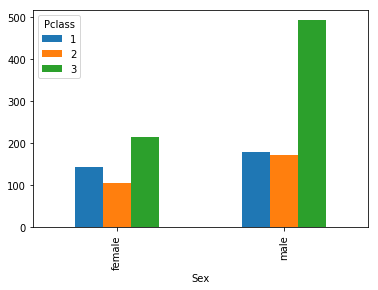

In [71]:
# use the crosstabs to plot barchart
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

#### Pivot table

In [72]:
# pivots: median of each Sex-Pclass combination
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [75]:
# The same result can be acheived using:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [76]:
# Without usingthe unstack function
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

## Data Munging: Missing Values

### Missing Values

In [77]:
# Use the info command to detect missing values. This will show that Age, Fare, Cabin, Embarked all have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Feature: Embarked

In [78]:
# Extract rows with null values for Embarked
df[df.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [79]:
# Option1 filled the missing values with modal embarkment point, ie S. Determine how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [80]:
# The passengers with missing Embarked both survived. We can use the Embarkment point 
# point with the highest survival. Again the crosstabs shows S has the highest number of survivors.
pd.crosstab(df[df.Survived != -100].Survived, df[df.Survived != -100].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [81]:
#  The inplace arguments here means the existing df should be modified, rather than creating a new one.
# df.Embarked.fillna('S', inplace=True)

In [82]:
#Option2 Both passengers paid fare of 80 and are first-class. 
# Let's see the Embarked point with fare of about 80 for first class
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [83]:
# C has a first class fare closest to 80. We opt for C
df.Embarked.fillna('C', inplace=True)

In [84]:
# Lets check for null values again to see no more missing values for Embarked
df[df.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Survived    1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Feature: Fare

In [86]:
df[df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,-100


In [87]:
# The passenger boarded 3rd class from S. We use the median value for this class and point
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [88]:
df.Fare.fillna(median_fare, inplace=True)

#### Feature: Age

In [89]:

df[df.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,-100
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,-100
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,-100
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-100
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,-100
931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,-100
933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S,-100
939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q,-100
946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C,-100


In [90]:
# To set the maximum number of rows to display, use the max_rows property
pd.options.display.max_rows = 15

In [91]:
df[df.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,-100
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,-100
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,-100
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-100
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,-100
931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,-100
933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S,-100
...,...,...,...,...,...,...,...,...,...,...,...
847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0


In [92]:
df.groupby('Sex').Age.transform('median')

PassengerId
892    28.0
893    27.0
894    28.0
895    28.0
896    27.0
897    28.0
898    27.0
       ... 
885    28.0
886    27.0
887    28.0
888    27.0
889    27.0
890    28.0
891    28.0
Name: Age, Length: 1309, dtype: float64

#### Option1: Replace missing ages with mean age

In [93]:
#The issue here is that Age has some Outliers which makes mean unsuitable

#### Option2: Fill missing Age with median age of the gender

In [94]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

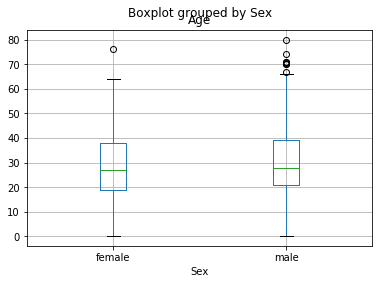

In [96]:
# visualize with boxplot
df[df.Age.notnull()].boxplot('Age', 'Sex');

In [98]:
# If we were using this:
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)
# However there seems to be no correspondence between age and sex. We try other alternative

#### Option3: Fill missing Age with median age of Pclass

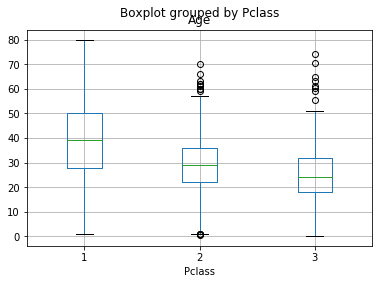

In [100]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [101]:
# There appear to be some correlaion between Pclas and median age.
# Pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

#### Option4: Fill missing Age with median age of Title

In [102]:

# Note that the title in a name can give some pointe of the age of the person
# Function to extract the title of a name
def get_title(name):
    first_name_with_title = name.split(',')[1]
    raw_title = first_name_with_title.split('.')[0]
    title = raw_title.strip().lower()
    return title

In [104]:
# Get a list of all titles
df.Name.map(lambda x: get_title(x))

PassengerId
892      mr
893     mrs
894      mr
895      mr
896     mrs
897      mr
898    miss
       ... 
885      mr
886     mrs
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 1309, dtype: object

In [105]:
# Get a list of unique titles
df.Name.map(lambda x: get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'ms', 'col', 'rev', 'dr', 'dona',
       'don', 'mme', 'major', 'lady', 'sir', 'mlle', 'capt',
       'the countess', 'jonkheer'], dtype=object)

In [106]:
# modify the function to reduce number of titles and return more meaningful functions
def get_title(name):
    title_map = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'miss': 'Miss',
        'mlle': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'sir': 'Sir',
        'jonkheer': 'Sir',
        'dr': 'Officer',
        'major': 'Officer',
        'capt': 'Office',
        'col': 'Officer',
        'lady': 'Lady',
        'the countess': 'Lady',
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    raw_title = first_name_with_title.split('.')[0]
    title = raw_title.strip().lower()
    return title_map[title]

In [107]:
# Now let's add a 'title' column to the data frame. This is a case of feature egineering
df['Title'] = df.Name.map(lambda x: get_title(x))

In [108]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-100,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-100,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-100,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-100,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-100,Mrs


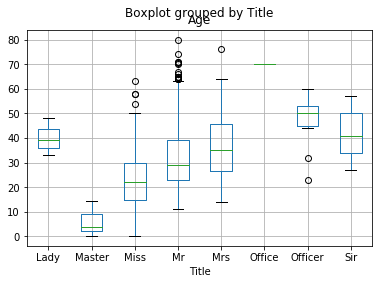

In [110]:
# Let's get a boxplot of age variation with title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [112]:
# There is an obvious correlation between title and age. This is a better option for filling missing age vaues
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [113]:
# Lets confirm
df[df.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,


## Data Munging: Outliers

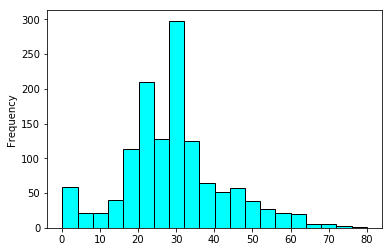

In [114]:
# Use the histogram to check for outliers
df.Age.plot(kind='hist', bins=20, color='cyan', edgecolor='black');

In [116]:
#rows with Age above 70
df.loc[df.Age>70]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,-100,Mrs
97,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,Mr
117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,Mr
494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,Mr
631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr
852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,Mr


In [117]:
# No clear outliers in Age. Let's check Fare

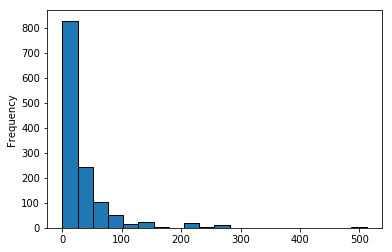

In [118]:
df.Fare.plot(kind='hist', edgecolor='black', bins=20);

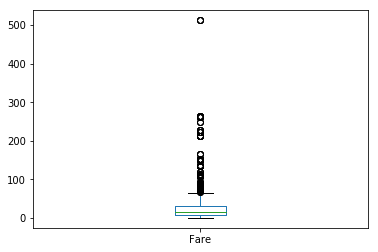

In [119]:
# Fare has a clear outlier of about 500. Let's visualize with boxplot
df.Fare.plot(kind='box');

In [120]:
# The boxplot shows outliers from about 50. Let's check rows where Fare equal maximum Fare
df[df.Fare == df.Fare.max()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-100,Mrs
259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,Miss
680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Mr
738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,Mr


In [121]:
# the four of them travelled first class from the same point and the same ticket number. 
# Three also survived but the fourth is in the test data
# let's apply some transofrmation to reduce the effect of outliers (using logarithm)
#The log transformation is suitable for data values that can not be negative
# 1 is added to take care of Fares that are zero, since log of zero is undefined
LogFare = np.log(df.Fare + 1)

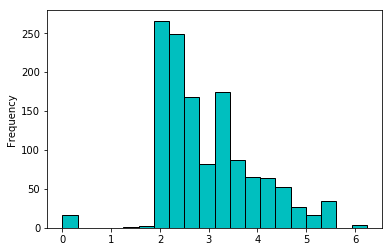

In [122]:
LogFare.plot(kind='hist', bins=20, edgecolor='black', color='c');

In [123]:
# bining: this is another treatment for outliers
pd.qcut(df.Fare, 4)

PassengerId
892     (-0.001, 7.896]
893     (-0.001, 7.896]
894     (7.896, 14.454]
895     (7.896, 14.454]
896     (7.896, 14.454]
897     (7.896, 14.454]
898     (-0.001, 7.896]
             ...       
885     (-0.001, 7.896]
886    (14.454, 31.275]
887     (7.896, 14.454]
888    (14.454, 31.275]
889    (14.454, 31.275]
890    (14.454, 31.275]
891     (-0.001, 7.896]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [125]:
 #bining: specifyng names or labels. 
# This converts a numerical feature to a categorical feature (4 categories). It is a case of discretization
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

PassengerId
892    very_low
893    very_low
894         low
895         low
896         low
897         low
898    very_low
         ...   
885    very_low
886        high
887         low
888        high
889        high
890        high
891    very_low
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

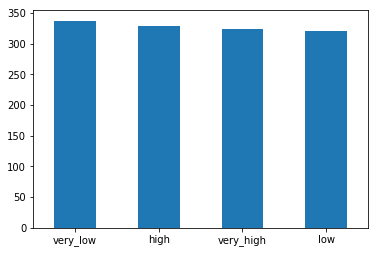

In [128]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', rot=0);

In [129]:
# Let's add a Fare_bin feature to the date
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [130]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-100,Mr,very_low
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-100,Mrs,very_low
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-100,Mr,low
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-100,Mr,low
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-100,Mrs,low


## Feature Engineering

#### Feature: AgeState

In [134]:
df['AgeState'] = np.where(df.Age >= 18, 'Adult', 'Child')

In [135]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [136]:
# crosstabs to see if AgeState has effect on survival
pd.crosstab(df[df.Survived != -100].Survived, df[df.Survived != -100].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


#### Feature: IsMother

In [137]:
# A lady aged more than 18 and who has Parch > 0 and is married (not a miss)
df['IsMother'] = np.where(((df.Age > 18) & (df.Parch > 0) & (df.Title != 'Miss') & (df.Sex == 'female')), 1,0)

In [138]:
# crosstabs. This shows that mothers survived more than non-mothers
pd.crosstab(df[df.Survived != -100].Survived, df[df.Survived != -100].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


#### Feature: FamilySize

In [139]:
# Family = parents + siblings + self
df['FamilySize'] = df.SibSp + df.Parch + 1

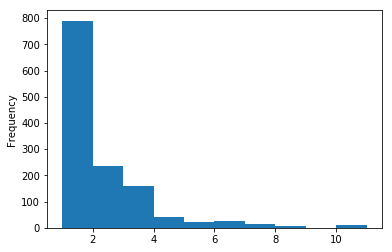

In [141]:

df['FamilySize'].plot(kind='hist');

In [142]:
df.loc[df.FamilySize == df.FamilySize.max(),['Name', 'Survived', 'FamilySize', 'Ticket', 'Embarked']]

,Name,Survived,FamilySize,Ticket,Embarked
PassengerId,,,,,
1080,"Sage, Miss. Ada",-100,11,CA. 2343,S
1234,"Sage, Mr. John George",-100,11,CA. 2343,S
1252,"Sage, Master. William Henry",-100,11,CA. 2343,S
1257,"Sage, Mrs. John (Annie Bullen)",-100,11,CA. 2343,S
160,"Sage, Master. Thomas Henry",0,11,CA. 2343,S
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343,S
202,"Sage, Mr. Frederick",0,11,CA. 2343,S
325,"Sage, Mr. George John Jr",0,11,CA. 2343,S
793,"Sage, Miss. Stella Anna",0,11,CA. 2343,S


In [143]:
# Above information shows All those with the highest family size travelled with the same ticket and  
# seven did not survive. Most likely the rest also did not survive
# crosstabs: This skows that survival decreases with increasing family size
pd.crosstab(df[df.Survived != -100].Survived, df[df.Survived != -100].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### Feature: Deck

In [144]:
# We will leverage on Cabin feature to create the Deck info
df.Cabin

PassengerId
892     NaN
893     NaN
894     NaN
895     NaN
896     NaN
897     NaN
898     NaN
       ... 
885     NaN
886     NaN
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 1309, dtype: object

In [145]:
# Apart from the NaN values, a cabin has a letter followed by a number. Let's see the distinct values
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105', 'C123', 'C103', 'D56', 'A6', 'D33', 'B30',
       'C52', 'B28', 'C83', 'F G73', 'A5', 'D26', 'C110', 'E101', 'F E69',
       'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49', 'A32', 'B4', 'B80',
       'A31', 'D36', 'C93', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'A19', 'B49', 'C65', 'E36', 'B18', 'C124

In [146]:
# There is single value of T which seems out of place. Probably an error. We set it to nan
df.loc[df.Cabin == 'T', 'Cabin'] == np.NaN

PassengerId
340    False
Name: Cabin, dtype: bool

In [147]:
# Add a Deck feature and set its value to the first character of the cabin
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [148]:
df.Deck.value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [149]:
# A large number of passengers have no deck info. Let's see if there is correlation between Deck and survival
pd.crosstab(df[df.Survived != -100].Survived, df[df.Survived != -100].Deck)

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [150]:
# Aparently, those without decks have lower survival
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 17 columns):
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Survived      1309 non-null int64
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
IsMother      1309 non-null int64
FamilySize    1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 215.3+ KB


### Categorical Feature Encoding

In [151]:
# Binary Encoding of Sex. 
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [152]:
# Use the get_dummies to one-hot encode several attributes at a go. It can even handle binary featues as well
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 41 columns):
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1309 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1309 non-null float64
Cabin                 295 non-null object
Survived              1309 non-null int64
IsMother              1309 non-null int64
FamilySize            1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_T                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pcl

#### Drop and reorder columns

In [154]:
# Let's remove all the features that have been encoded: Sex, Pclass, Cabin, Deck, Name, Title, Fare_Bin, Embarked, 
# AgeState, Age, SibSp, Parch. We will also remove the ticket feature for now. 
# We will drop these columns and reorder the remaining ones
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 35 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
IsMother              1309 non-null int64
FamilySize            1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_T                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_

In [156]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [157]:
df.loc[df.Survived != -100].to_csv(write_train_path)
df.loc[df.Survived == -100].to_csv(write_test_path)

#### Building a reproducible script

In [159]:
# This script will handle the automated processing, from reading raw data to processing to saving of processed script
processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'processed_data.py')

In [160]:
%%writefile $processed_data_script_file
import os
import numpy as np
import pandas as pd


def read_data():
    raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    
    train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
    test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')
    test_df['Survived'] = -100
    
    df = pd.concat([train_df, test_df], sort=-False, axis=0)
    return df


def process_data(df):
    return(df
           .assign(Title = lambda x: x.Name.map(get_title))
           .pipe(fill_missing_values)
           .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
           .assign(AgeState = lambda x: np.where(x.Age >= 18, 'Adult', 'Child'))
           .assign(FamilySize = lambda x: x.Parch + x.SibSp + 1)
           .assign(IsMother = lambda x: np.where(((x.Age > 18) & (x.Parch > 0) & (x.Title != 'Miss') & (x.Sex == 'female')), 1,0))
           .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
           .assign(Deck = lambda x: x.Cabin.map(get_deck))
           .assign(IsMale = lambda x: np.where(x.Sex == 'male', 1, 0))
           .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
           .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
           .pipe(reorder_columns)
          )
    

# modify the function to reduce number of titles and return more meaningful functions
def get_title(name):
    title_map = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'miss': 'Miss',
        'mlle': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'sir': 'Sir',
        'jonkheer': 'Sir',
        'dr': 'Officer',
        'major': 'Officer',
        'capt': 'Office',
        'col': 'Officer',
        'lady': 'Lady',
        'the countess': 'Lady',
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    raw_title = first_name_with_title.split('.')[0]
    title = raw_title.strip().lower()
    return title_map[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def fill_missing_values(df):
    #Embarked
    df.Embarked.fillna('C', inplace=True)
    
    # Fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    
    #Age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)
    
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df


def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    
    df.loc[df.Survived != -100].to_csv(write_train_path)
    
    columns = [column for column in df.columns if column != 'Survived']
    df.loc[df.Survived == -100][columns].to_csv(write_test_path)
    
if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Writing ../src/data/processed_data.py


In [161]:
!python $processed_data_script_file

### Advanced Visualization Using Matplotlib

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

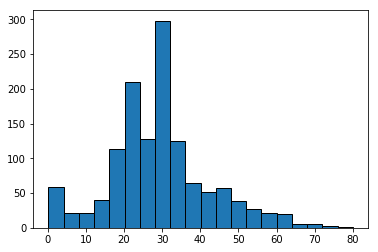

In [165]:
plt.hist(df.Age, edgecolor='black', bins=20);

Text(0, 0.5, 'counts')

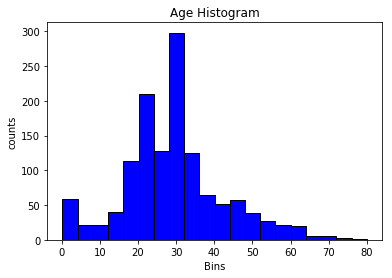

In [166]:
# Adding, title and labels to the histogram
plt.hist(df.Age, color='blue', edgecolor='black', bins=20);
plt.title('Age Histogram')
plt.xlabel('Bins')
plt.ylabel('counts')

Text(0, 0.5, 'Counts')

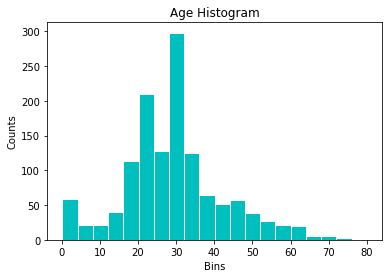

In [167]:
# Alternative way of adding title and labels. 
# This method if you want to add subplots ie multiple plots in the same visualization
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c', edgecolor='white')
ax.set_title('Age Histogram')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

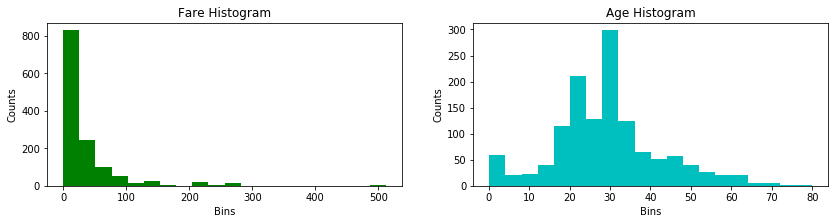

In [168]:
# Add subplots. two subplots side-by-side, ie 1X2. The figure is 14 inch wide and 3 inch high
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))

# plot1
ax1.hist(df.Fare, bins=20, color='green')
ax1.set_title('Fare Histogram')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='c')
ax2.set_title('Age Histogram')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

Text(0, 0.5, 'Fare')

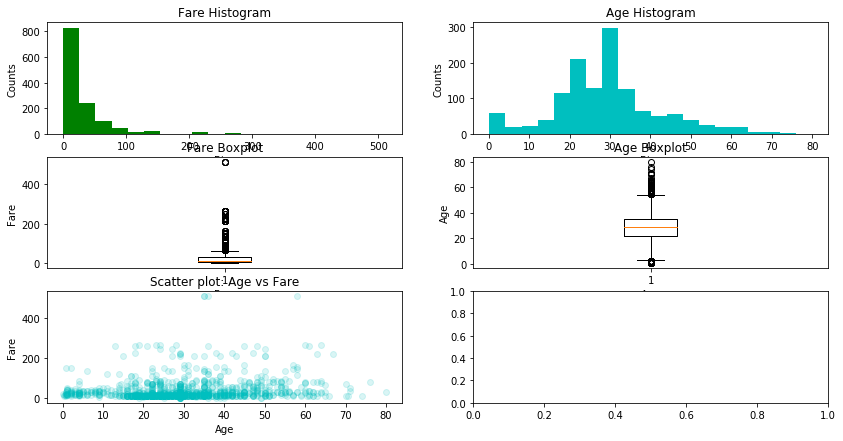

In [169]:
# For 5 subplots, we add a 3X2 figure (leaving one empty space)
f, ax_arr = plt.subplots(3, 2, figsize=(14,7))
ax_arr[0,0].hist(df.Fare, bins=20, color='green')
ax_arr[0,0].set_title('Fare Histogram')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Age Histogram')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Fare Boxplot')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Age Boxplot')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

ax_arr[2,0].scatter(df.Age, df.Fare, alpha=0.15, color='c')
ax_arr[2,0].set_title('Scatter plot: Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

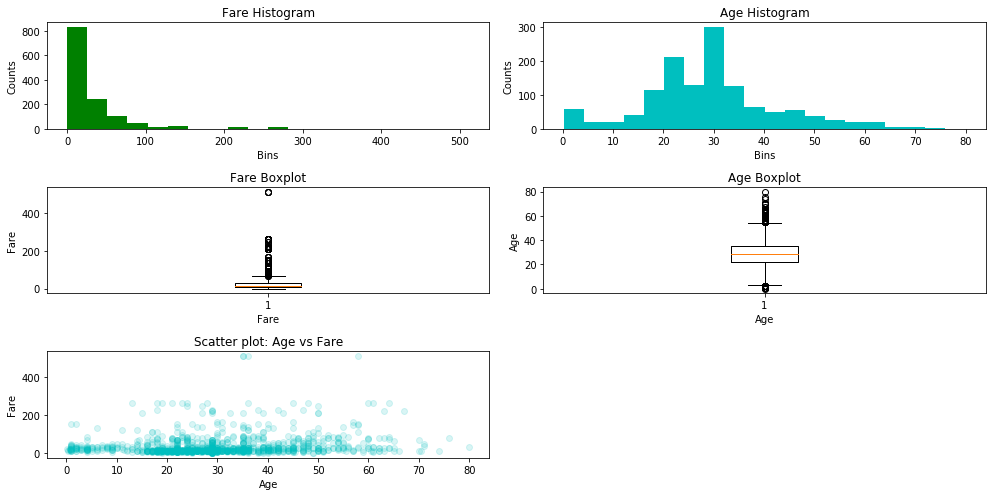

In [170]:
#To remove the overlap between plots, we use plt.tight_layout function. This will adjust the subplots with some paddings
# To remove the empty subplot, we add ax_arr[2,1].axis('off')

f, ax_arr = plt.subplots(3, 2, figsize=(14,7))
ax_arr[0,0].hist(df.Fare, bins=20, color='green')
ax_arr[0,0].set_title('Fare Histogram')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Age Histogram')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Fare Boxplot')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Age Boxplot')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

ax_arr[2,0].scatter(df.Age, df.Fare, alpha=0.15, color='c')
ax_arr[2,0].set_title('Scatter plot: Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()